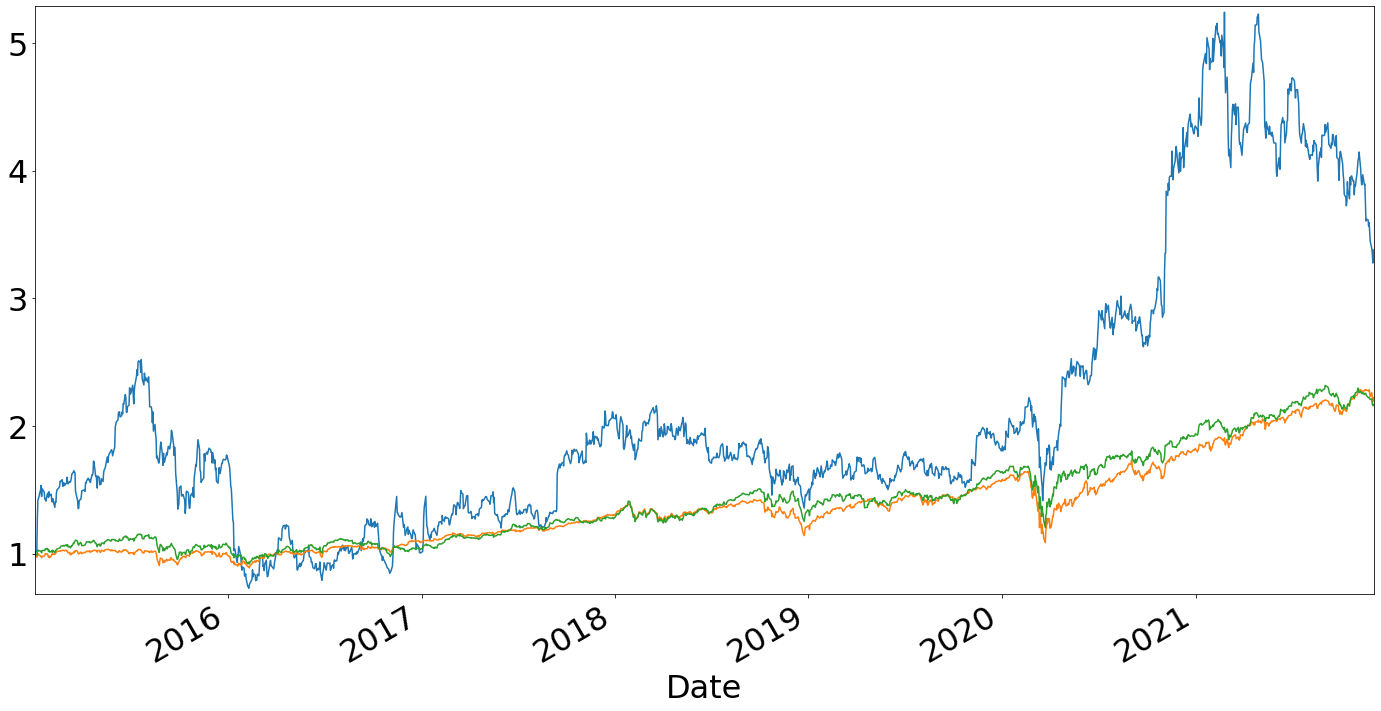

In [12]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import pandas as pd
start = datetime.datetime(2015,1,1)
end = datetime.datetime.today()
plt.rcParams.update({"font.size": 32})
tickers = ["HALO", "^GSPC", "VHCIX"]
data_dct = {}
for t in tickers:
    data_dct[t] = web.DataReader(t, "yahoo", start = start, end = end)["Adj Close"]
data = pd.DataFrame(data_dct)

pct_change = data.pct_change()

normalized = pct_change.add(1).cumprod()
normalized.fillna(1, inplace = True)

fig, ax = plt.subplots(figsize = (24,12))
normalized.plot.line(legend= False,
                     ax = ax, 
                     #color = "red"
                    )
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0.01 
plt.show()
plt.close();

In [13]:
pct_change.corr()

,HALO,^GSPC,VHCIX
HALO,1.000000,0.418325,0.517972
^GSPC,0.418325,1.000000,0.872586
VHCIX,0.517972,0.872586,1.000000


In [14]:
from mylib.mean_variance import *

In [17]:
ols(pct_change,["VHCIX"], ["HALO"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HALO   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     638.4
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          2.96e-120
Time:                        16:04:29   Log-Likelihood:                 3836.6
No. Observations:                1743   AIC:                            -7669.
Df Residuals:                    1741   BIC:                            -7658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VHCIX          1.4166      0.056     25.266      0.000       1.307       1.527
Intercept      0.0005      0.001      0.703      0.482      -0.001       0.002
==============================================================================
Omnibus:                      435.789   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5974.364
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                      11.936   Cond. No.                         87.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jacobradke/Documents/GitHub/jacobradke/Project/datlib/plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


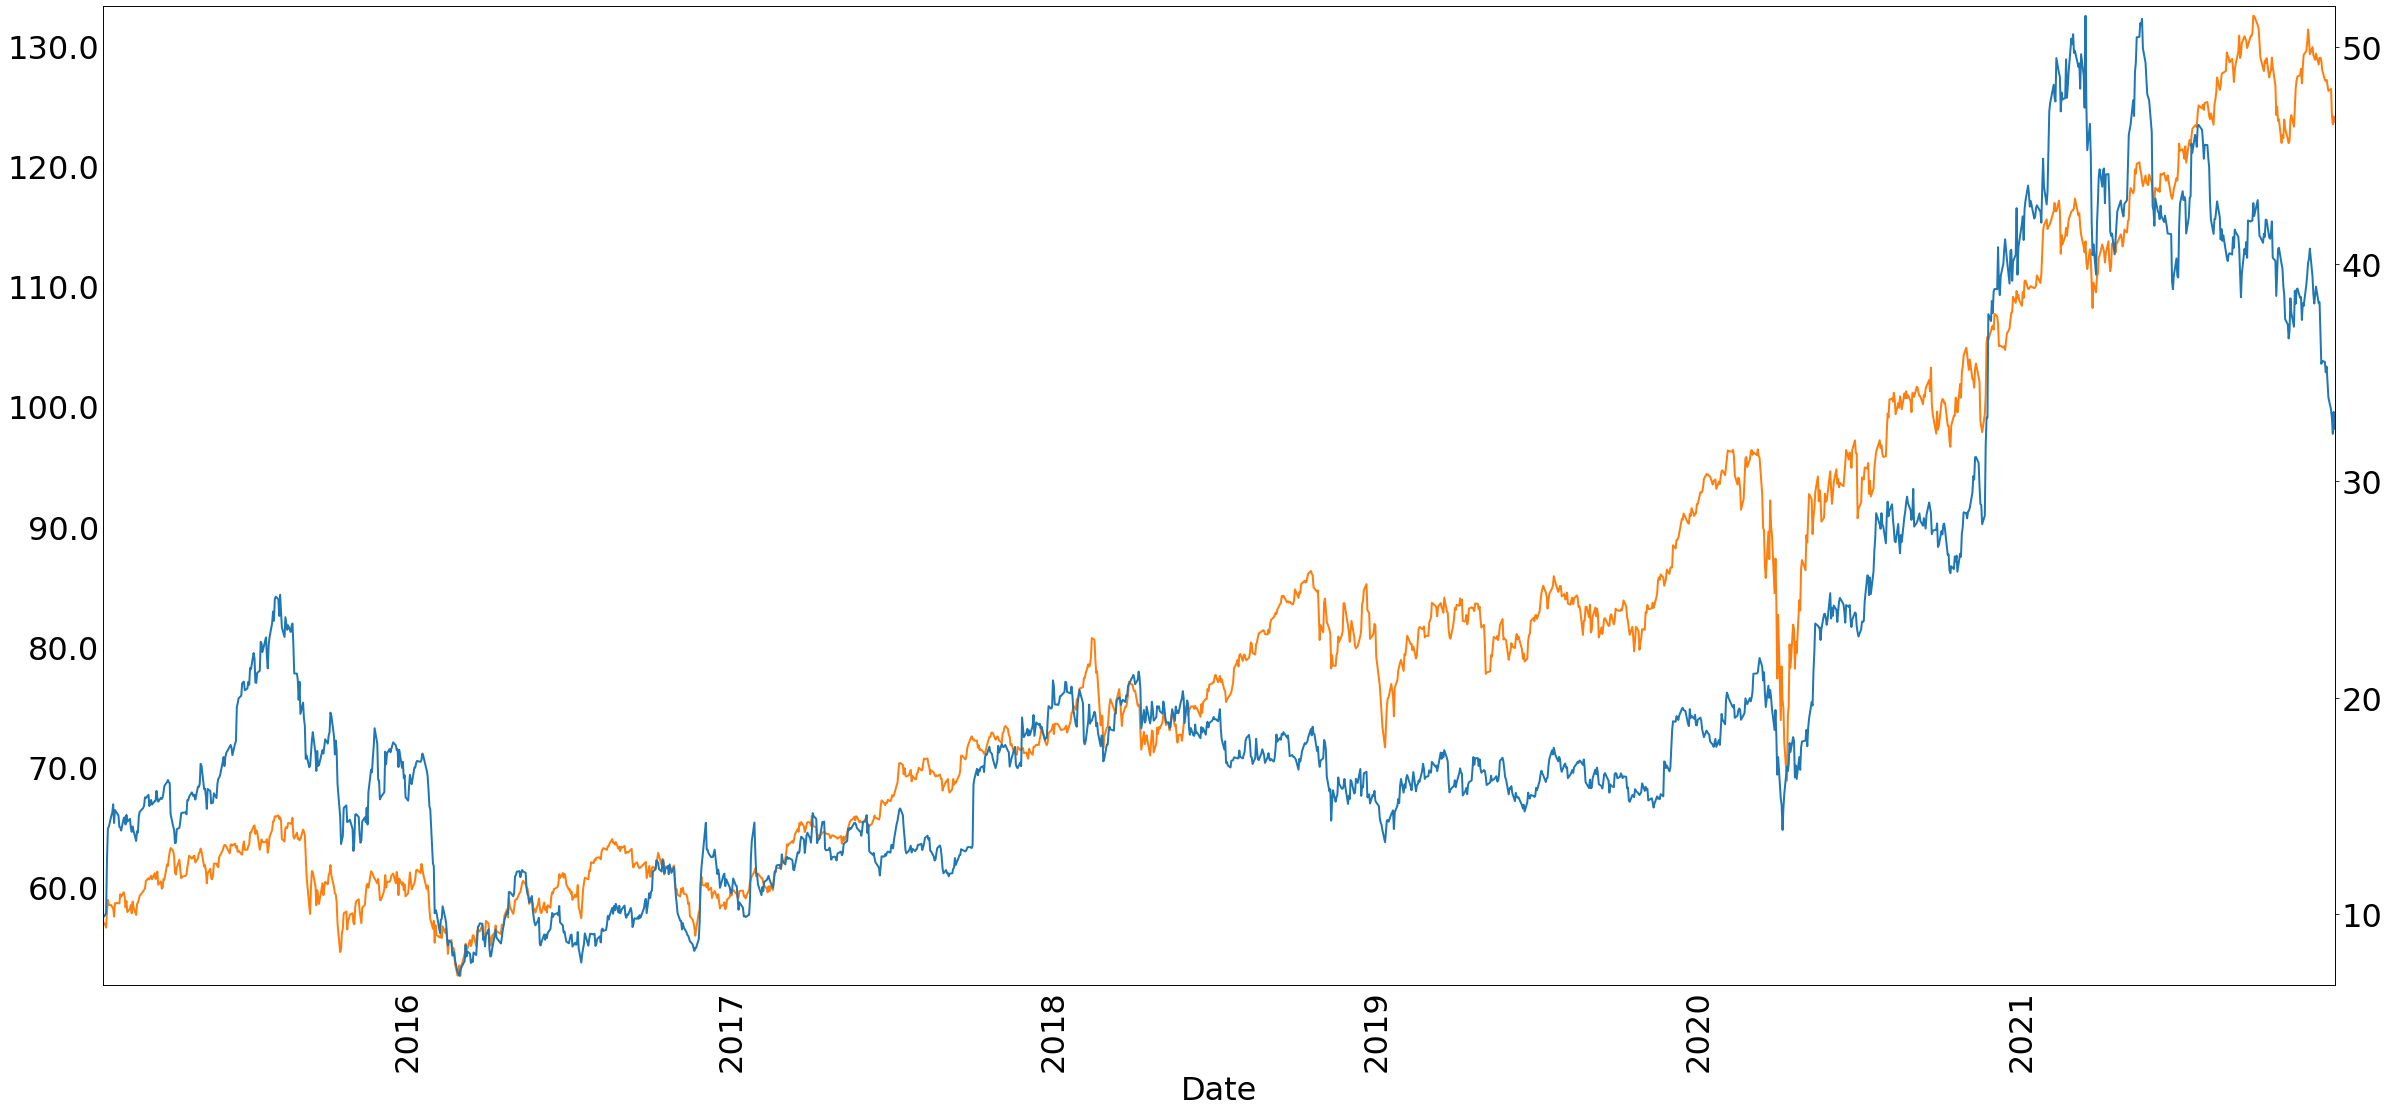

In [18]:
from datlib.plots import *

plot_lines(data[["HALO", "VHCIX"]], secondary_y = "HALO", legend = False, linewidth = 2)